In [64]:
import pandas as pd 
import numpy as np
import scipy.stats as stats

import seaborn as sn
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from src.processing import *
from src.wordcloud import *


!pwd

/home/matt/portfolio/personal_portfolio/spotify


In [65]:
tracks = pd.read_csv('./data/tracks.csv')
artists = pd.read_csv('./data/artists.csv')

In [85]:
cleaned_artists = clean_artists(artists)
cleaned_artists['genres'].value_counts()

1104349 total artists
298616 artists with labeled genres
459962 genre-artist pairs after processing


dance pop                572
pop                      568
rock                     564
electro house            558
classical performance    502
                        ... 
baluchi folk               3
musica timor-leste         2
himene tarava              2
mazandarani folk           2
swazi traditional          1
Name: genres, Length: 5360, dtype: int64

In [81]:
artist_split

,id,followers,genres,name,popularity,genres_clean
45,0VLMVnVbJyJ4oyZs2L3Yl2,71.0,'carnaval cadiz',Las Viudas De Los Bisabuelos,6,'carnaval cadiz'
46,0dt23bs4w8zx154C5xdVyl,63.0,'carnaval cadiz',Los De Capuchinos,5,'carnaval cadiz'
47,0pGhoB99qpEJEsBQxgaskQ,64.0,'carnaval cadiz',Los “Pofesionales”,7,'carnaval cadiz'
48,3HDrX2OtSuXLW5dLR85uN3,53.0,'carnaval cadiz',Los Que No Paran De Rajar,6,'carnaval cadiz'
136,22mLrN5fkppmuUPsHx6i2G,59.0,'classical harp',Vera Dulova,3,"'classical harp', 'harp'"
...,...,...,...,...,...,...
1104328,1q9C5XlekzXbRLIuLCDTre,90087.0,'teen pop',Brent Rivera,33,"'social media pop', 'teen pop'"
1104331,4fh2BIKYPFvXFsQLhaeVJp,309.0,'la indie',Lone Kodiak,20,'la indie'
1104334,7akMsd2vb4xowNTehv3gsY,774.0,'indie rockism',The Str!ke,0,'indie rockism'
1104336,35m7AJrUCtHYHyIUhCzmgi,205.0,'indie rockism',Hunter Fraser,6,'indie rockism'


In [71]:
def masked_wordcloud(data, mask, name, min_font = 3, colormap_choice='tab20c'):
    '''
    input: artist_split dataframe, mask file path, image name, minimum font, color pallete
    returns: saved wordcloud image, prints used genre text
    '''
    artist_genres = data[data['genres'] != '[]'].copy()
    artist_genres['genres_clean'] = artist_genres['genres'].str.strip("[]")
    text = " ".join(genre for genre in artist_genres['genres_clean']).replace("'", "").replace('"', '').replace(',', '')

    note_mask = np.array(Image.open(mask))
    note_mask = note_mask[:,:,2]

    wc = WordCloud(mask=note_mask, min_font_size = min_font, colormap=colormap_choice)
    wc.generate(text)
    
    plt.figure(figsize=[15,7])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(f'{img_path}{name}.png')

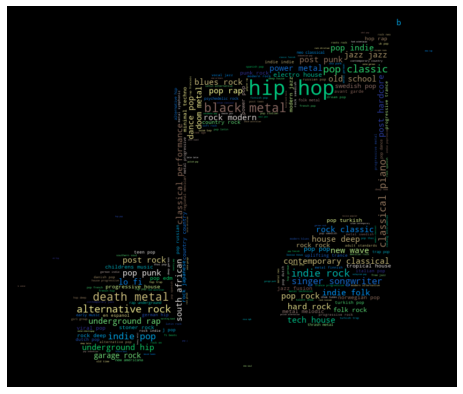

In [72]:
mask = '/home/matt/portfolio/personal_portfolio/spotify/img/note.png'

masked_wordcloud(artists, mask, 'note_genres', colormap_choice='terrain')